# import libraries

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

In [3]:
data=pd.read_csv('segmentation data.csv')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
data.set_index('ID',inplace=True)

In [5]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


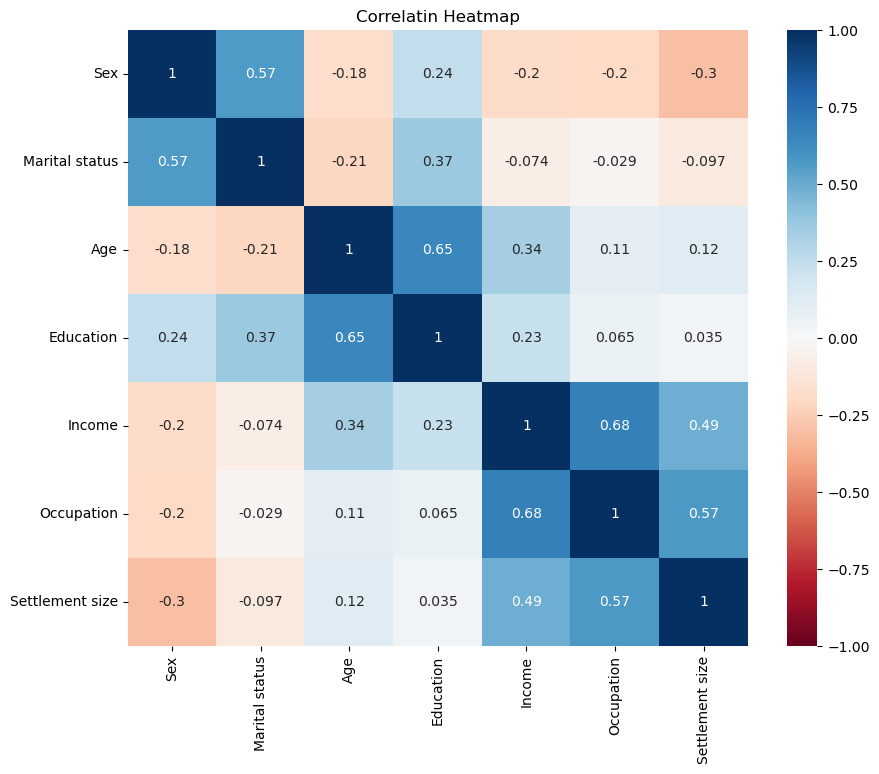

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.title('Correlatin Heatmap')
plt.show()

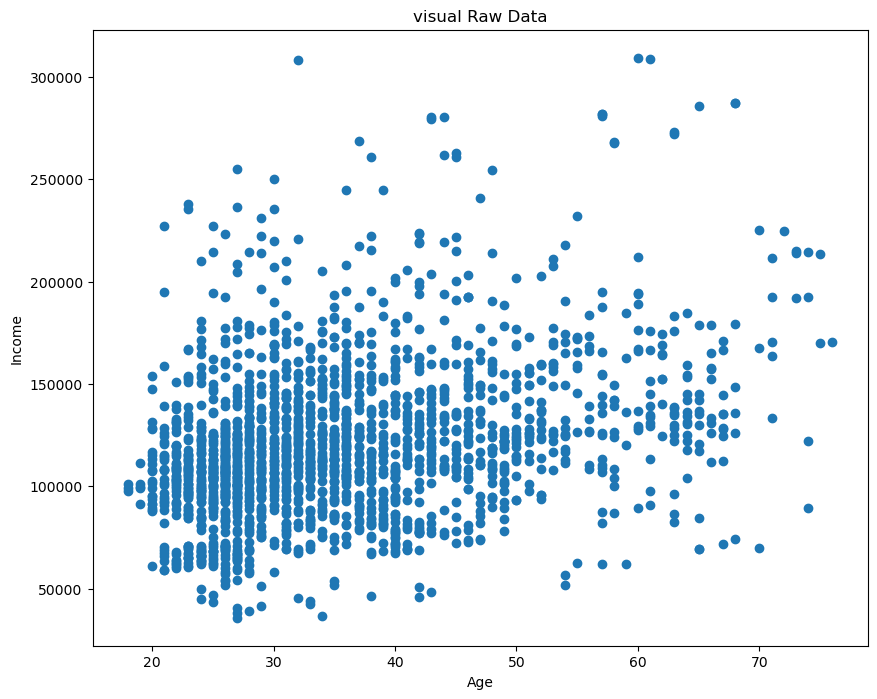

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(data=data,x='Age',y='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('visual Raw Data')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
data_scaled

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# Hierarchical Clustering

In [12]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [13]:
hier_clus=linkage(data_scaled , method='ward')

In [14]:
hier_clus

array([[4.78000000e+02, 1.95700000e+03, 3.41213651e-04, 2.00000000e+00],
       [6.73000000e+02, 8.21000000e+02, 3.93708059e-04, 2.00000000e+00],
       [8.67000000e+02, 9.33000000e+02, 8.92404934e-04, 2.00000000e+00],
       ...,
       [3.99200000e+03, 3.99500000e+03, 5.67337517e+01, 1.18000000e+03],
       [3.99000000e+03, 3.99400000e+03, 6.30691755e+01, 8.20000000e+02],
       [3.99600000e+03, 3.99700000e+03, 7.73495855e+01, 2.00000000e+03]])

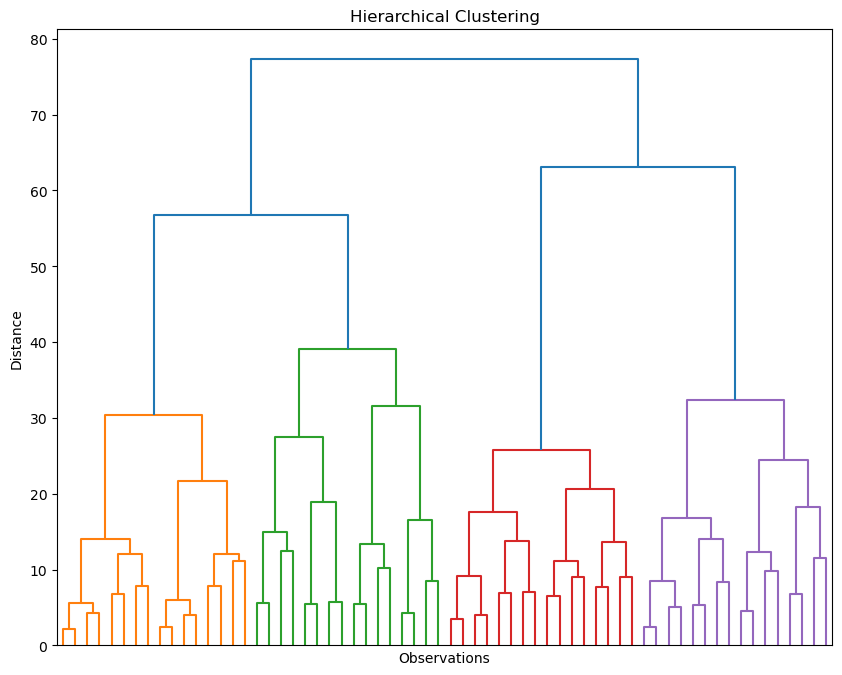

In [15]:
plt.figure(figsize=(10,8))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clus,no_labels=True,truncate_mode='level',p=5)
plt.show()

# Kmeans Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [18]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

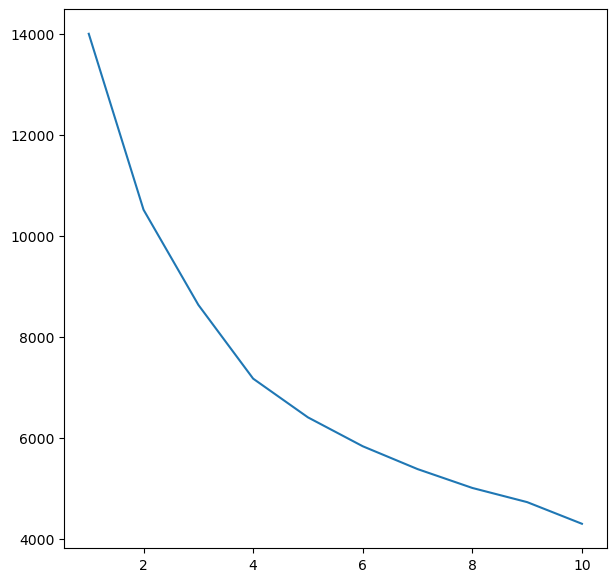

In [19]:
plt.figure(figsize=(7,7))
plt.plot(range(1,11),wcss)
plt.style.use('fivethirtyeight')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

# results

In [21]:
df_analysis=data.copy()
df_analysis['clusters']=kmeans.labels_
df_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,2
100001998,0,0,31,0,86400,0,0,1


In [22]:
df_analysis.groupby('clusters').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [23]:
df_analysis.clusters.value_counts()/df_analysis.clusters.value_counts().values.sum()

2    0.3525
3    0.2850
1    0.2310
0    0.1315
Name: clusters, dtype: float64

In [24]:
df_analysis=df_analysis.replace({'clusters':0},'well-off').replace({'clusters':1},'fewer opportunities').replace({'clusters':2},'standard').replace({'clusters':3},'career focused')

In [25]:
df_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,well-off
100000002,1,1,22,1,150773,1,2,standard
100000003,0,0,49,1,89210,0,0,fewer opportunities
100000004,0,0,45,1,171565,1,1,career focused
100000005,0,0,53,1,149031,1,1,career focused
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,fewer opportunities
100001997,1,1,27,1,117744,1,0,standard
100001998,0,0,31,0,86400,0,0,fewer opportunities


C:\Users\sun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


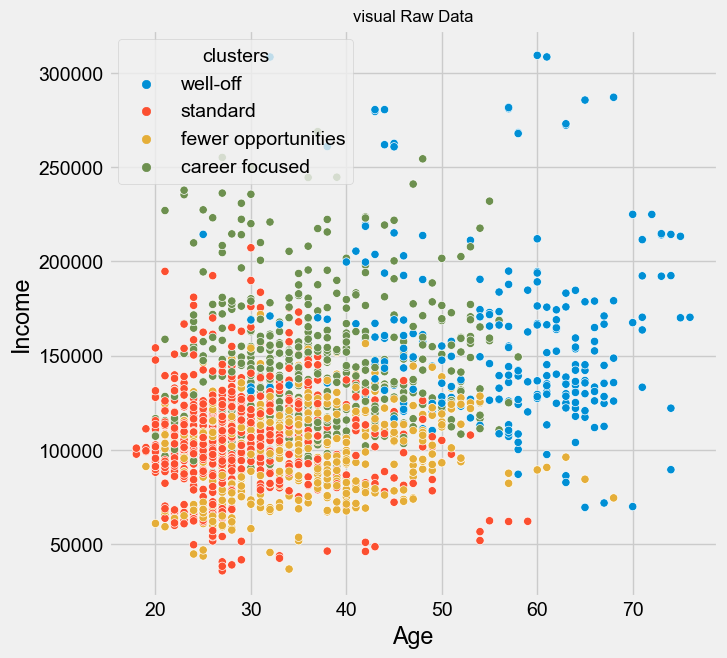

In [26]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_analysis['Age'],df_analysis['Income'],hue=df_analysis['clusters'])
sns.set(font_scale=1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('visual Raw Data')
plt.show()

# PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca=PCA()

In [29]:
pca.fit(data_scaled)

PCA()

In [30]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

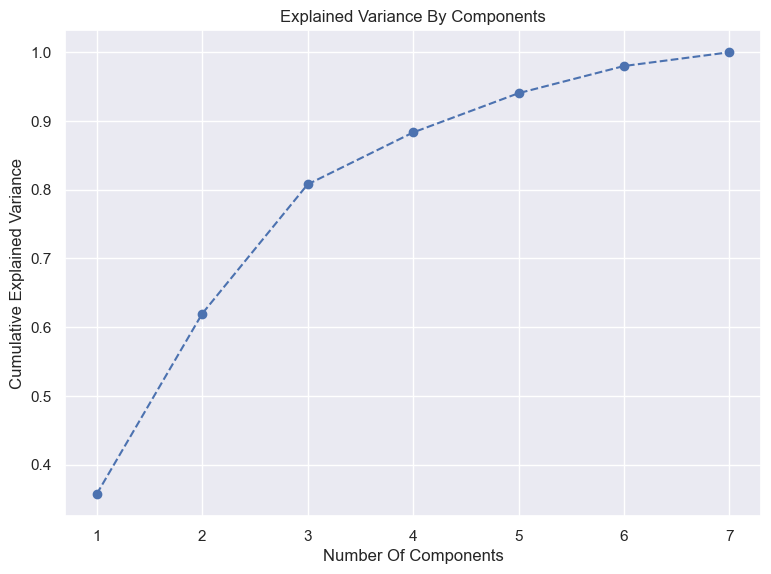

In [31]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance By Components')
plt.xlabel('Number Of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [32]:
pca=PCA(n_components=3)

In [33]:
pca.fit(data_scaled)

PCA(n_components=3)

# PCA Results

In [34]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [35]:
df_pca_comp=pd.DataFrame(pca.components_,columns=data.columns,index=['Component 1','Component 2','Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


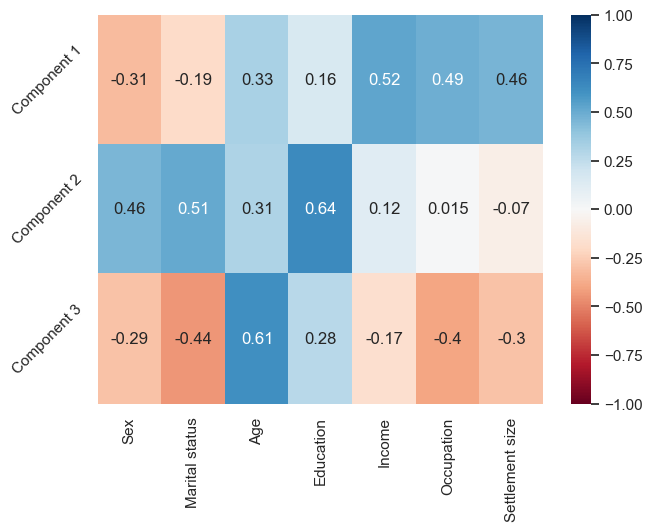

In [36]:
sns.heatmap(df_pca_comp,vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.yticks(rotation=45)
plt.show()

In [37]:
pca.transform(data_scaled)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [38]:
scores_pca=pca.transform(data_scaled)

# K_means Clustering with PCA

In [39]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

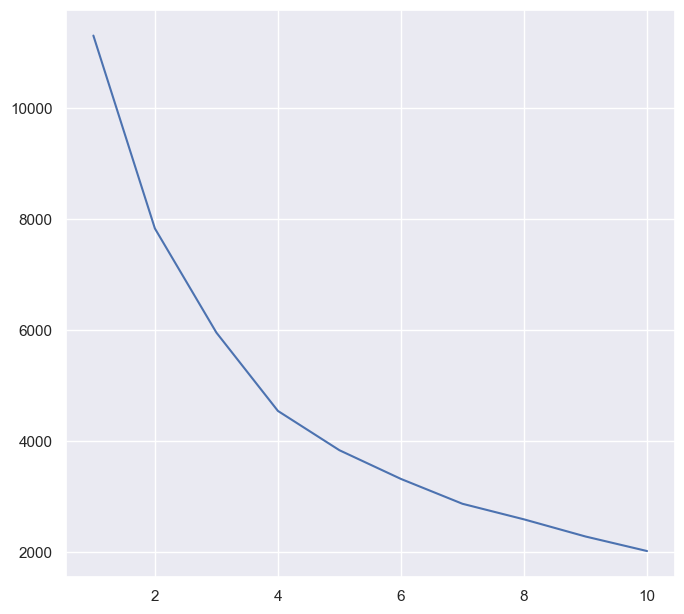

In [40]:
plt.figure(figsize=(7,7))
plt.plot(range(1,11),wcss)
plt.style.use('fivethirtyeight')
plt.show()

In [41]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [42]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [53]:
df_comp_pca=pd.concat([data.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_comp_pca.rename({0:'Component 1',1:'Component 2',2:'Component 3'},inplace=True,axis=1)
df_comp_pca['clusters']=kmeans_pca.labels_
df_comp_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,clusters
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


C:\Users\sun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


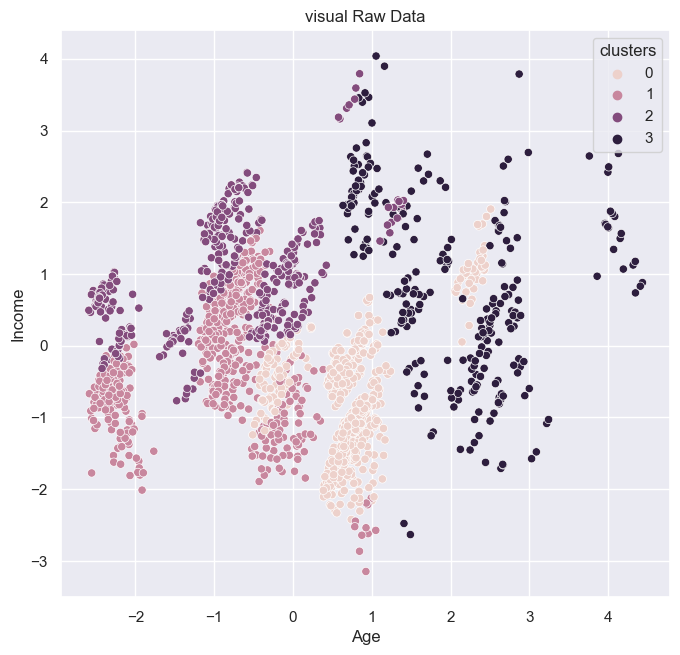

In [57]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_comp_pca['Component 2'],df_comp_pca['Component 3'],hue=df_comp_pca['clusters'])
sns.set(font_scale=1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('visual Raw Data')
plt.show()